<a href="https://colab.research.google.com/github/Maryannrichard/MSC-DATA-SCIENCE/blob/main/HEART_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MACHINE LEARNING PROJECT- HEART DISEASE PREDICTION MODEL

A notebook on Heart Disease Prediction. In this project, I used the PyCaret library to expedite the machine learning workflow, allowing me to quickly examine various models and choose the optimal one for forecasting an individual's risk of developing heart disease. Following a thorough study, logistic regression emerged as the top performer in terms of accuracy.

Below is steps I meticulously followed to ensure a comprehensive and robust approach to a good model.

- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Preprocessing](#Data-Preprocessing)
- [Model Building](#Model-Building)
- [Model Evaluation](#Model-Evaluation)



In [ ]:
# import the necessary libraries

# import library for reading data and analysing
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import library for Data preprocessing
from sklearn.model_selection import train_test_split

# Install pycaret
!pip install pycaret

# import library for selection of best model,prediction, evaluation
from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score





In [ ]:
# import google drive
from google.colab import drive

# mount googe drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

## features of the dataset and meaning
- age - age in years
- sex - (1=male, 0=female)
- cp- chest pain(1: typical angina. 2: atypical angina. 3: non-angina pain. 4 asymptomatic)
- trestbps -resting blood pressure(in mm on admission in the Hospital)
- chol - serum cholestrol in mg/dl
- fbs- (fasting blood sugar >120mg/dl)(1=true, 0=false)
- restecg- resting electrocardiographic results
- thalach- maximun heart rate achieved
- exang- exercise induced angina(1=yes, 0=no)
- oldpeak- ST depression induced by exercise relative to rest
- slope- the slope of the peak exercise ST segment
- ca- no. of major vessels(0-3) colored by flourosopy
- thal- 3= normal, 6=fixed defect, 7=reversible defect
- target- have heart disease or not( 1=yes, 0=no)

## Data Overview
- Observations
- Sanity checks

In [ ]:
# check for features and length of the features
print('Data features')
print(df.columns)

# Check for the no. of features
print('Total number of features')
print(len(df.columns))

# check the number of data points
print('No. of Data points')
print(df.shape[0])

Data features
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Total number of features
14
No. of Data points
303


In [ ]:
# check for overall information of the data like data types, each feature entry points etc
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# perform statistical analysis to understand our data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory data analysis
EDA is an important aspect of any project involving data. Visual presentatin of some features in the data and  the relationship that exist among the features of the data helps in determining the right model to implore and the tunning to implore.
Critical questions are answered with the help of an EDA

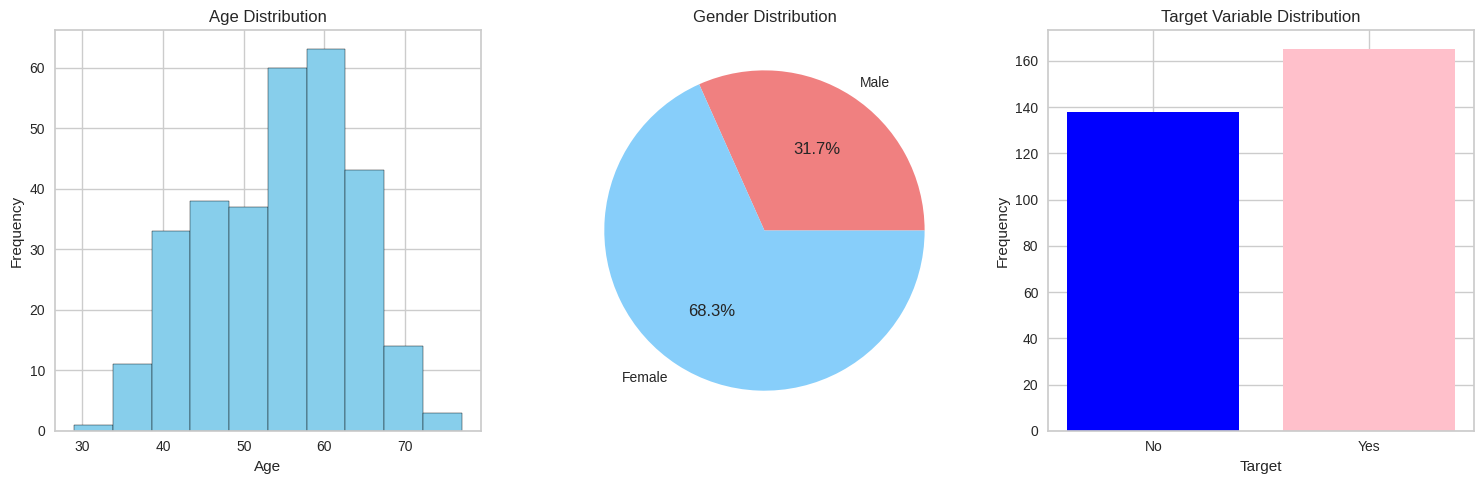

In [ ]:
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot bar chart for age
axes[0].hist(df['age'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot pie chart for gender
gender_counts = np.unique(df['sex'], return_counts=True)
labels= ['Male', 'Female']
axes[1].pie(gender_counts[1], labels=labels, autopct='%1.1f%%',
            colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Gender Distribution')

# Plot bar plot for target variable
target_labels = {0: 'No', 1: 'Yes'}
target_data = [target_labels[val] for val in df['target']]
target_counts = np.unique(target_data, return_counts=True)
axes[2].bar(target_counts[0], target_counts[1], color=['blue', 'pink'])
axes[2].set_title('Target Variable Distribution')
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Frequency')
axes[2].set_xticks(target_counts[0])

plt.tight_layout()
plt.show()

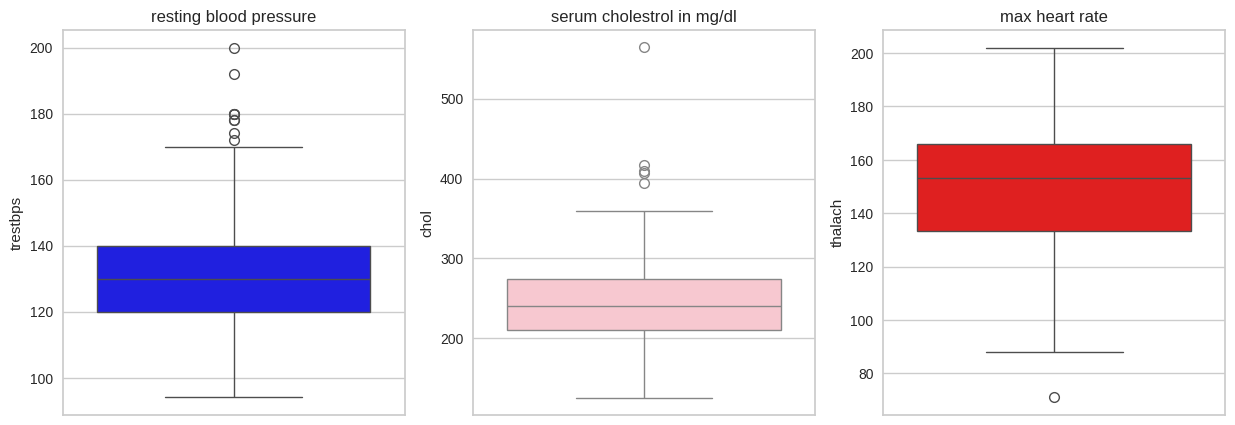

In [ ]:
# check for outliers using the information gathered from the statistical summary

fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(df['trestbps'], ax=axes[0], color='blue')
axes[0].set_title('resting blood pressure')

sns.boxplot(df['chol'], ax=axes[1], color='pink')
axes[1].set_title('serum cholestrol in mg/dl')

sns.boxplot(df['thalach'], ax=axes[2], color='red')
axes[2].set_title('max heart rate')

plt.show();


## Data Preprocessing

- segment Data
- split data

In [ ]:
## separating the target and test variables from the data set
X = df.drop('target', axis=1)
y = df['target']

# splitting the data for training purpose
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=42)

## Model Building

we will deploy pycaret library to get the best model for our data given that pycaret is a powertool that trains the data set across all models at the same time and produces their result thereby saving time of trying to train the model with different model at different times.


In [ ]:
# setting up the classifier from pycaret library
clf_setup = setup(data= X, target= y, session_id=42)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# instatiating the model/running the models using pycaret library

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8444,0.9069,0.8879,0.8379,0.8598,0.6847,0.6920,2.0340
ridge,Ridge Classifier,0.8444,0.0000,0.9129,0.8242,0.8642,0.6818,0.6937,0.0950
nb,Naive Bayes,0.8396,0.9012,0.8758,0.8466,0.8545,0.6731,0.6870,0.1290
lda,Linear Discriminant Analysis,0.8396,0.9071,0.9129,0.8178,0.8605,0.6721,0.6847,0.1610
et,Extra Trees Classifier,0.8305,0.9164,0.8606,0.8438,0.8489,0.6550,0.6614,0.4640
rf,Random Forest Classifier,0.8260,0.9140,0.8864,0.8221,0.8500,0.6416,0.6508,0.6680
qda,Quadratic Discriminant Analysis,0.8071,0.8860,0.8348,0.8209,0.8246,0.6084,0.6145,0.2020
ada,Ada Boost Classifier,0.8071,0.8663,0.8439,0.8252,0.8294,0.6054,0.6143,0.3900
gbc,Gradient Boosting Classifier,0.8022,0.8901,0.8705,0.7932,0.8281,0.5954,0.6030,0.5180
xgboost,Extreme Gradient Boosting,0.8022,0.8826,0.8606,0.7992,0.8267,0.5949,0.6021,0.1900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Based on the above report, Logistic Regression was selected to be deployed in our model building.

We will continue the model building leveraging on libraries from scikit.


### BUILDING LOGISTIC REGRESSION WITH HYPERPARAMETERS

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty (L1 or L2)
    'solver': ['liblinear', 'saga'],  # Solver for optimization
    'max_iter': randint(100, 500),  # Maximum number of iterations
}

# instantiating the model
log_reg = LogisticRegression(random_state=42)

# Create RandomizedSearchCV object
rand_search = RandomizedSearchCV(estimator=log_reg,
                                   param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
rand_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", rand_search.best_params_)

# Get the best model
lr_model = rand_search.best_estimator_


Best Parameters: {'C': 0.25456616528867426, 'max_iter': 379, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# fitting our test data to our model

lr_pred = lr_model.predict(X_test)

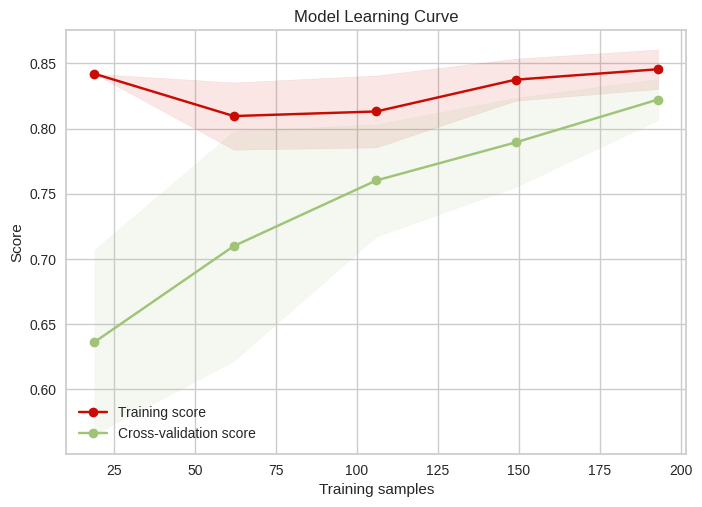

In [ ]:
# plotting the model learning curve
# Function to plot learning curve
def plot_learning_curve(model, X, y,title,cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, return_times=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.title(title)  #
    plt.xlabel('Training samples')
    plt.ylabel('Score')
    plt.legend(loc="best")
    return plt.gca()

# Plot learning curve for the Model
plot_learning_curve(lr_model, X_train, y_train,
                    title="Model Learning Curve")
plt.show();




## Evaluation of our model
for the evaluation we will use the accuracy score, classification report, confusion matrix and receiver operating characteristic(ROC) to understand how well our model performed.

In [ ]:
# Evaluating the model
print('LOGISTIC MODEL EVALUATION')
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)
target_name =['No','Yes']
print(classification_report(y_test, lr_pred, target_names=target_name))

# Generate a confusion matrix
cfm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(cfm)



LOGISTIC MODEL EVALUATION
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

          No       0.89      0.86      0.88        29
         Yes       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[25  4]
 [ 3 29]]


### VISUALIZING THE CONFUSION MATRIX

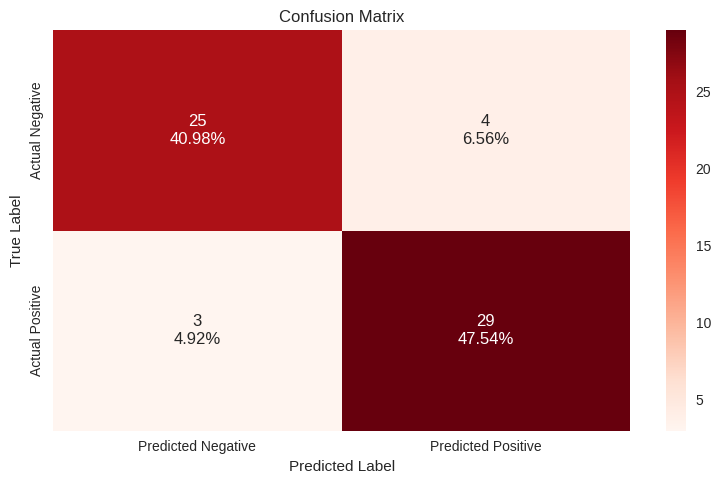

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8,5))
# confusion matrix for model with hyperparameters
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cfm.flatten().sum())]
        for item in cfm.flatten()
        ]).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt="", cmap='Reds',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

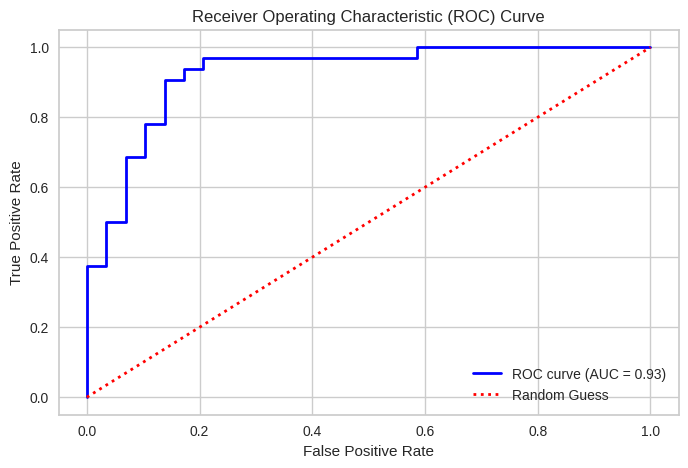

In [ ]:
# Plotting the ROC curve

y_prob = lr_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='dotted', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Create dataframe for our result

df_result = pd.DataFrame({'Actual_values':y_test, 'Predicted_values': lr_pred})
df_result['loss'] = df_result['Actual_values'] - df_result['Predicted_values']
df_result

,Actual_values,Predicted_values,loss
179,0,0,0
228,0,1,-1
111,1,1,0
246,0,0,0
60,1,1,0
...,...,...,...
249,0,0,0
104,1,1,0
300,0,0,0
193,0,0,0


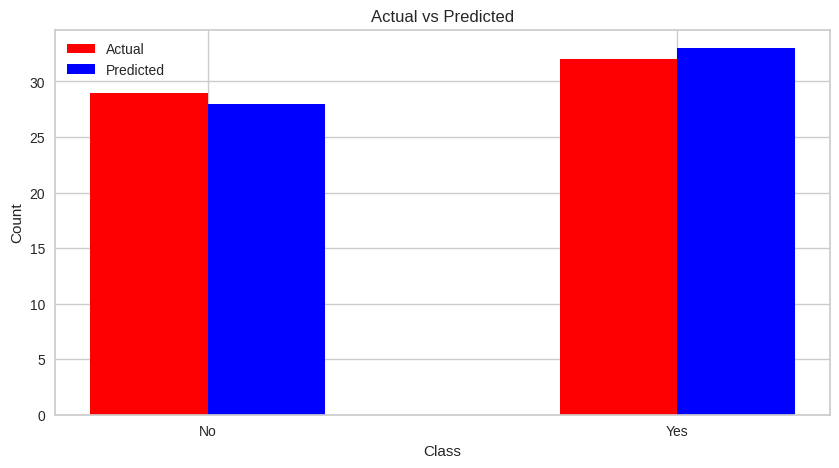

In [ ]:
# plotting our result data

# Count occurrences of each class
actual_counts = np.bincount(df_result['Actual_values'])
predicted_counts = np.bincount(df_result['Predicted_values'])

# Create labels for the bars
labels = ['No', 'Yes']

# Create positions for the bars
x = np.arange(len(labels))

# Width of the bars
width = 0.25

# Plot the bars for actual and predicted
plt.figure(figsize=(10,5))

# Plot for actual
plt.bar(x - width, actual_counts, width, label='Actual', color='red')

# Plot for predicted
plt.bar(x, predicted_counts, width, label='Predicted', color='blue')

# Add labels, title, and legend for actual and predicted
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted')
plt.xticks(x - width/2, labels=labels)
plt.legend()

plt.show()

In [ ]:
# Perform cross-validation with 5 folds
# This will split the data into 5 equal parts, train the model on 4 parts,
# and evaluate it on the remaining part
# It will repeat this process 5 times,
# each time using a different part as the validation set
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("CV Mean accuracy:", scores.mean())
print("CV Standard deviation of accuracy:", scores.std())

# Calculate the training score (accuracy)
training_score = lr_model.score(X_train, y_train)
print("Training Score:", training_score)

Cross-validation scores: [0.79591837 0.83673469 0.79166667 0.83333333 0.85416667]
CV Mean accuracy: 0.8223639455782313
CV Standard deviation of accuracy: 0.0244129084035262
Training Score: 0.8512396694214877


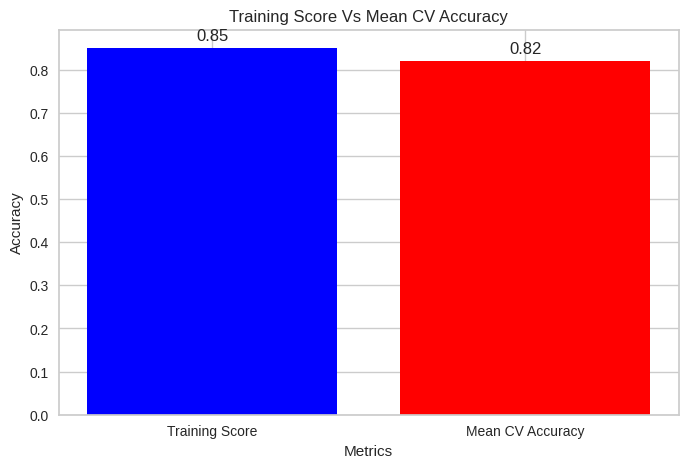

In [ ]:
# Visualizing the CV mean accuracy score VS training accuracy score
categories = ['Training Score', 'Mean CV Accuracy']
scores = [0.85, 0.82]

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(categories, scores, color=['blue', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Training Score Vs Mean CV Accuracy')

for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.show()
